## Importing the necessary libraries for our analysis.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#starting with loading the data into the program
data = pd.read_csv('purchase_data.csv')
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
263010,1004473,P00041942,M,36-45,1.0,B,3,0.0,5.0,18.0,NaN,3722.0
263011,1004473,P00115142,M,36-45,1.0,B,3,0.0,1.0,8.0,17.0,19253.0
263012,1004473,P00188442,M,36-45,1.0,B,3,0.0,5.0,7.0,NaN,3608.0
263013,1004473,P00119442,M,36-45,1.0,B,3,0.0,5.0,NaN,NaN,3604.0


In [3]:
#information on the features from the column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263015 entries, 0 to 263014
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263015 non-null  int64  
 1   Product_ID                  263014 non-null  object 
 2   Gender                      263014 non-null  object 
 3   Age                         263014 non-null  object 
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  object 
 6   Stay_In_Current_City_Years  263014 non-null  object 
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          181501 non-null  float64
 10  Product_Category_3          80582 non-null   float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 24.1+ MB


In [4]:
#getting the first look at the data
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [5]:
#column names
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [6]:
#label encoding on the categorical columns
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()

In [8]:
data['User_ID'] = le.fit_transform(data['User_ID'])
print("User_ID", le.classes_)
data['Product_ID'] = le.fit_transform(data['Product_ID'])
print("Product_ID", le.classes_)
data['Gender'] = le.fit_transform(data['Gender'])
print("Gender", le.classes_)
data['Age'] = le.fit_transform(data['Age'])
print("Age", le.classes_)
data['City_Category'] = le.fit_transform(data['City_Category'])
print("City_Category", le.classes_)

User_ID [     10 1000001 1000002 ... 1006038 1006039 1006040]
Product_ID ['P00000142' 'P00000242' 'P00000342' ... 'P0099842' 'P0099942' nan]
Gender ['F' 'M' nan]
Age ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+' nan]
City_Category ['A' 'B' 'C' nan]


In [9]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0', nan], dtype=object)

In [10]:
 #changing all the values for 4+ to 4 
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].replace('4+', '4')

In [11]:
#changing the datatype from string to integer
data['Stay_In_Current_City_Years'] = pd.to_numeric(data['Stay_In_Current_City_Years'],errors="coerce")

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263015 entries, 0 to 263014
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263015 non-null  int64  
 1   Product_ID                  263015 non-null  int32  
 2   Gender                      263015 non-null  int32  
 3   Age                         263015 non-null  int32  
 4   Occupation                  263014 non-null  float64
 5   City_Category               263015 non-null  int32  
 6   Stay_In_Current_City_Years  263014 non-null  float64
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          181501 non-null  float64
 10  Product_Category_3          80582 non-null   float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(7), int32(4), int64(1)
memory usage: 20.1 MB


In [13]:
#checking the null values in the data
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         1
City_Category                      0
Stay_In_Current_City_Years         1
Marital_Status                     1
Product_Category_1                 1
Product_Category_2             81514
Product_Category_3            182433
Purchase                           1
dtype: int64

In [14]:
#since the data is large in size, dropping the null values 
data = data.dropna()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80582 entries, 1 to 263011
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     80582 non-null  int64  
 1   Product_ID                  80582 non-null  int32  
 2   Gender                      80582 non-null  int32  
 3   Age                         80582 non-null  int32  
 4   Occupation                  80582 non-null  float64
 5   City_Category               80582 non-null  int32  
 6   Stay_In_Current_City_Years  80582 non-null  float64
 7   Marital_Status              80582 non-null  float64
 8   Product_Category_1          80582 non-null  float64
 9   Product_Category_2          80582 non-null  float64
 10  Product_Category_3          80582 non-null  float64
 11  Purchase                    80582 non-null  float64
dtypes: float64(7), int32(4), int64(1)
memory usage: 6.8 MB


In [16]:
data.head(20)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1,2304,0,0,10.0,0,2.0,0.0,1.0,6.0,14.0,15200.0
6,4,1684,1,4,7.0,1,2.0,1.0,1.0,8.0,17.0,19215.0
13,5,1304,1,2,20.0,0,1.0,1.0,1.0,2.0,5.0,15665.0
14,6,2133,0,5,9.0,0,1.0,0.0,5.0,8.0,14.0,5378.0
16,6,3475,0,5,9.0,0,1.0,0.0,2.0,3.0,4.0,13055.0
18,7,356,1,3,1.0,1,1.0,1.0,1.0,14.0,16.0,11788.0
19,8,2310,1,2,12.0,2,4.0,1.0,1.0,5.0,15.0,19614.0
24,8,2823,1,2,12.0,2,4.0,1.0,1.0,8.0,14.0,11927.0
28,9,730,1,2,17.0,2,0.0,0.0,5.0,8.0,14.0,5391.0
29,10,795,0,3,1.0,1,4.0,1.0,2.0,4.0,8.0,16352.0


In [17]:
#getting the five points summary
data.describe()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000,80582.000000
mean,2873.199809,1422.191693,0.776216,2.451540,8.173426,1.087513,1.860775,0.401752,2.738366,6.892085,12.658298,11628.183279
std,1664.796297,915.002638,0.416782,1.338429,6.487913,0.758965,1.285501,0.490255,2.563225,4.498417,4.129156,5069.515441
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,186.000000
25%,1427.000000,701.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,2.000000,9.000000,7868.000000
50%,2916.000000,1286.000000,1.000000,2.000000,7.000000,1.000000,2.000000,0.000000,1.000000,6.000000,14.000000,11744.500000
75%,4215.000000,2044.000000,1.000000,3.000000,14.000000,2.000000,3.000000,1.000000,4.000000,10.000000,16.000000,15610.000000
max,5891.000000,3506.000000,1.000000,6.000000,20.000000,2.000000,4.000000,1.000000,15.000000,16.000000,18.000000,23958.000000


In [18]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

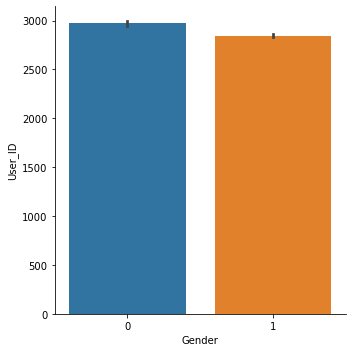

In [19]:
#visualizations to understand the distribution of the various features
sns.catplot(data=data, x='Gender', y='User_ID', kind='bar')

### Amongst all the purshases made, majority of the purchases were made by Women/Female.

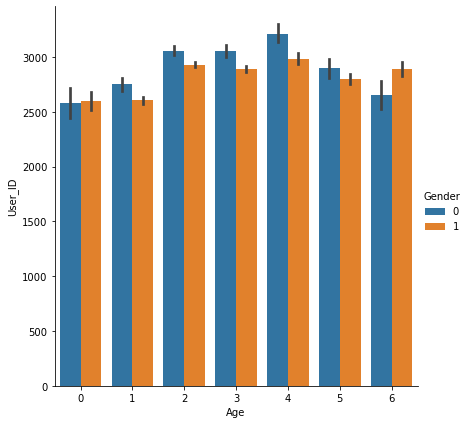

In [20]:
sns.catplot(data=data, x='Age', y='User_ID', hue='Gender', kind='bar', height=6)

###Inferences from the Plot:
1. The most frequent purchases came from the females having user ids that belong to age category 4(36-45)
2. The least frequent purchases came from the males of the age category 1(18-25), and females of age category 0(0-17). 

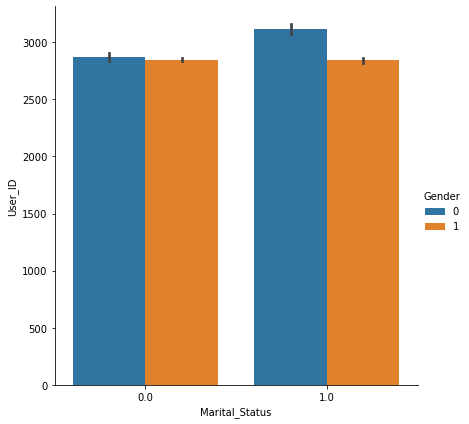

In [21]:
sns.catplot(data=data, x='Marital_Status', y='User_ID', hue='Gender', kind='bar', height=6)

### the gender ratio in unmarried customers is almost similar, whereas the married customers have a sightly higher number of females in the lot. 

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

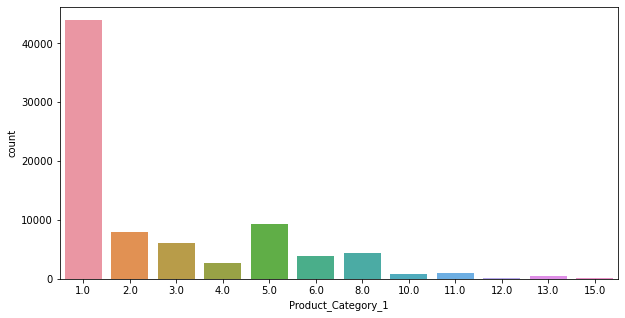

In [22]:
plt.figure(figsize=(10,5))
sns.countplot(data['Product_Category_1'])

### The product_category_1 sees a great rise of product category 1 and diminishes with the other products. The other considerable categories are 5, 2, 3, 6, 8, etc.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

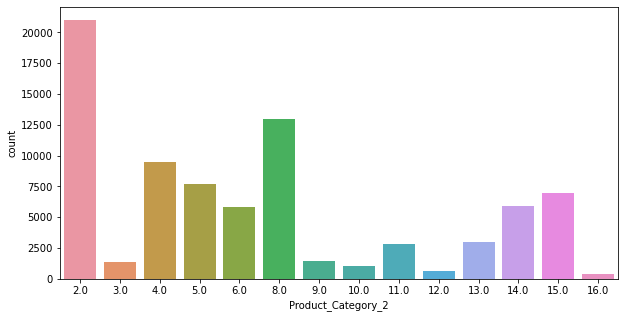

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(data['Product_Category_2'])

### Product_Category_2 sees a considerate balance among categories. With category 2 topping the charts, and other considerable categories are 8, ,4,5,6,14,15,etc.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

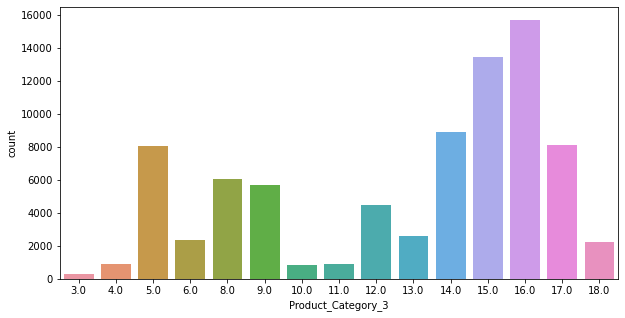

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data['Product_Category_3'])

### For product_category_3, the balance is towards the end with 16 topping the charts, and other considerable categories are 15, 14, 5, 8, 9, 17, etc.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='count'>

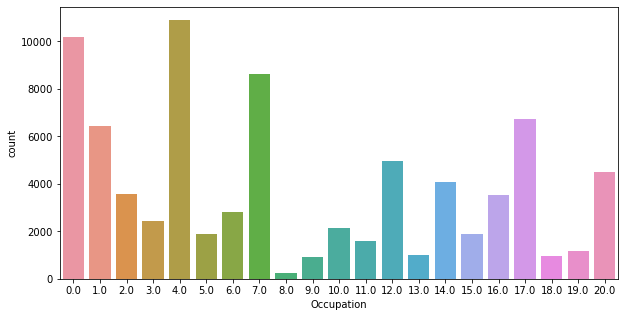

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(data['Occupation'])

### occupation also sees a constant balance with 4 topping the chart, and other categories in the considerable amount with 0,1,2,7,12,17,20.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

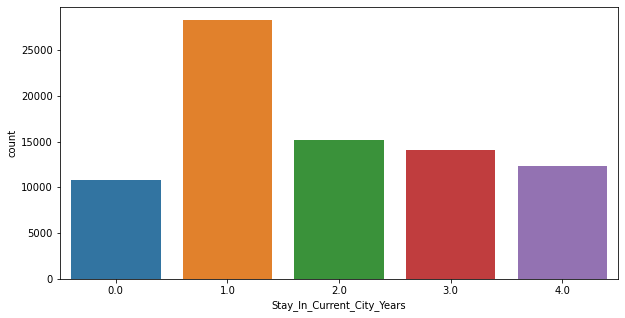

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(data['Stay_In_Current_City_Years'])

### Majority of the customers have stayed a year in the city.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Purchase', ylabel='Density'>

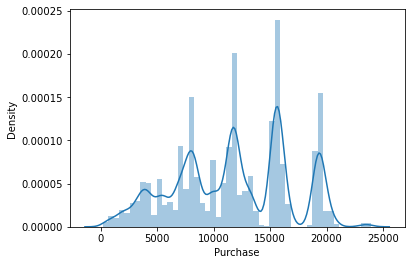

In [27]:
sns.distplot(data['Purchase'])

### Purchases is not accumulated in a range, rather varies in different intervals. 

In [28]:
#checking the correlation of the features
corr_spearman = data.corr()
corr_pearson = data.corr(method='pearson')
corr_kendall = data.corr(method='kendall')

<AxesSubplot:>

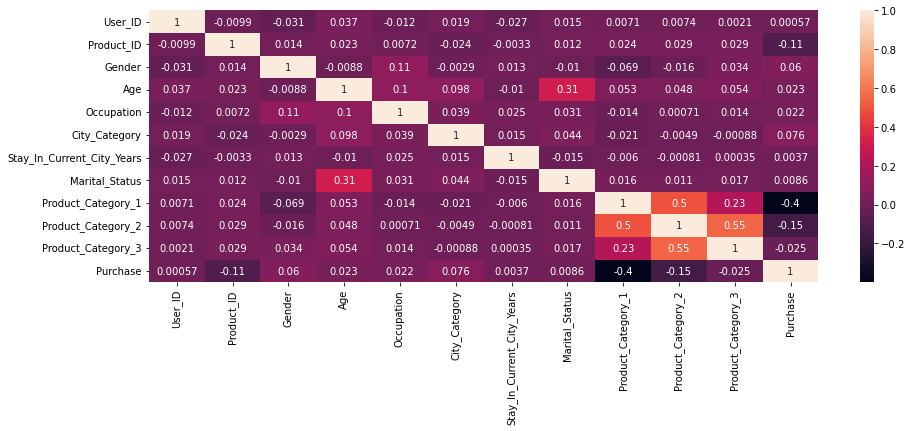

In [29]:
#spearman correlation
plt.figure(figsize=(15,5))
sns.heatmap(corr_spearman, annot=True)

<AxesSubplot:>

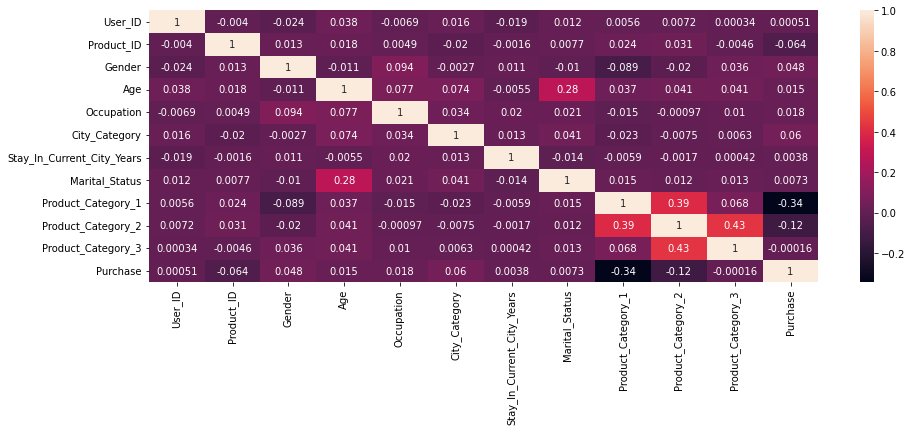

In [30]:
#kendall correlation
plt.figure(figsize=(15,5))
sns.heatmap(corr_kendall, annot=True)

<AxesSubplot:>

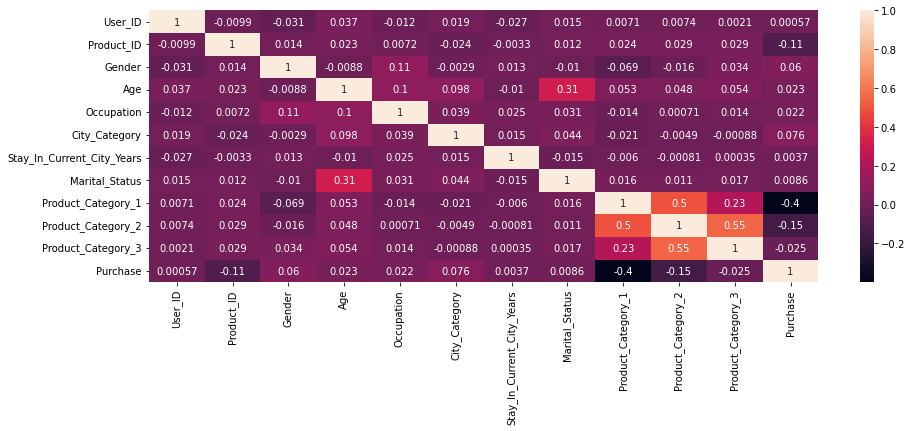

In [31]:
#pearson correlation
plt.figure(figsize=(15,5))
sns.heatmap(corr_pearson, annot=True)

## Statistical Analysis 

In [32]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1,2304,0,0,10.0,0,2.0,0.0,1.0,6.0,14.0,15200.0
6,4,1684,1,4,7.0,1,2.0,1.0,1.0,8.0,17.0,19215.0
13,5,1304,1,2,20.0,0,1.0,1.0,1.0,2.0,5.0,15665.0
14,6,2133,0,5,9.0,0,1.0,0.0,5.0,8.0,14.0,5378.0
16,6,3475,0,5,9.0,0,1.0,0.0,2.0,3.0,4.0,13055.0
...,...,...,...,...,...,...,...,...,...,...,...,...
262997,4360,2433,0,4,16.0,1,0.0,1.0,1.0,11.0,16.0,15175.0
263001,4360,1921,0,4,16.0,1,0.0,1.0,1.0,11.0,15.0,15430.0
263003,4360,3209,0,4,16.0,1,0.0,1.0,1.0,2.0,15.0,15387.0
263006,4360,329,0,4,16.0,1,0.0,1.0,8.0,13.0,16.0,5861.0


### One Sample Test For Mean 
let's Suppose, it was observed that the average purchase made by the Men of the age 18-25 was 10000. Is it still the same? 

In [33]:
#null hypothesis - The mean is 10000
#alternate hypothesis - The mean is not 10000

In [34]:
new_data = data.loc[(data['Age'] == 1) & data['Gender'] == 1]

In [35]:
new_data.shape

(11904, 12)

In [36]:
new_data["Purchase"].mean()

11785.18817204301

In [37]:
sample_size = 1000
sample = new_data.sample(sample_size, random_state=0)

In [38]:
pos_mean = 10000

In [39]:
sample_mean = sample['Purchase'].mean()
print(sample_mean)

11750.447


In [40]:
#one sample t-test
from scipy.stats import ttest_1samp

In [41]:
t_stat, p_value = ttest_1samp(sample['Purchase'], pos_mean)
print(t_stat, p_value)

10.912366335912562 2.8550147774368676e-26


In [42]:
#P-value is less than 0.05, reject the null hypothesis. 
#therefore, the mean purchase for men aged 18-25 is not 10000. 

### One Sample Test for Proportion
Let's Suppose, It was observed that the percentage of women that spend more than 10000 was 35%. Is it still the same?

In [43]:
#null hypothesis - proportion is 35%.
#alternate hypothesis - proportion is not 35%. 

data_new = data.loc[(data['Purchase'] > 10000)]

In [44]:
data_new

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1,2304,0,0,10.0,0,2.0,0.0,1.0,6.0,14.0,15200.0
6,4,1684,1,4,7.0,1,2.0,1.0,1.0,8.0,17.0,19215.0
13,5,1304,1,2,20.0,0,1.0,1.0,1.0,2.0,5.0,15665.0
16,6,3475,0,5,9.0,0,1.0,0.0,2.0,3.0,4.0,13055.0
18,7,356,1,3,1.0,1,1.0,1.0,1.0,14.0,16.0,11788.0
...,...,...,...,...,...,...,...,...,...,...,...,...
262995,4360,1087,0,4,16.0,1,0.0,1.0,1.0,11.0,15.0,11661.0
262997,4360,2433,0,4,16.0,1,0.0,1.0,1.0,11.0,16.0,15175.0
263001,4360,1921,0,4,16.0,1,0.0,1.0,1.0,11.0,15.0,15430.0
263003,4360,3209,0,4,16.0,1,0.0,1.0,1.0,2.0,15.0,15387.0


In [45]:
#No of women in the sample
count = data_new['Gender'].value_counts()[0]

#number of observations
nobs = len(data_new['Gender'])

#hypothesised value
p0 = 0.35

In [46]:
data_new['Gender'].value_counts()

1    39215
0    10175
Name: Gender, dtype: int64

In [47]:
count
nobs

49390

In [48]:
#data_new['Gender'].value_counts()/nobs

In [49]:
#one sample z test
from statsmodels.stats.proportion import proportions_ztest

In [50]:
z_stat, p_val = proportions_ztest(count=count, 
                                  nobs=nobs, 
                                  value=p0)
print(z_stat, p_val)

-79.12020590883206 0.0


In [51]:
#p-value is less than 0.05, reject the null hypothesis. 
#the proportion of women spending more than 10000, is not 35%. 

### Two Sample test for Means
Is the average purchase made by men and women of the age 18-25 same?

In [52]:
#null hypothesis - average spends are equal 
#alternate hypothesis - average spends are not equal

data_men = data.loc[(data['Gender'] == 1)& (data['Age'] == 1)]
data_women = data.loc[(data['Gender'] == 0) & (data['Age'] == 1)]

In [53]:
#creating samples
data_men_sample = data_men.sample(500, random_state=0)
data_women_sample = data_women.sample(500, random_state=0)

In [54]:
#checking variances of the two samples
print(data_men_sample.Purchase.var())
print(data_women_sample.Purchase.var())

25403579.49849695
26680870.93292181


In [55]:
#sample means 
print(data_men_sample.Purchase.mean())
print(data_women_sample.Purchase.mean())

11885.35
10758.212


In [56]:
#computing f statistic
from scipy.stats import f
F = data_men_sample.Purchase.mean()/data_women_sample.Purchase.mean()
print(F)

1.1047700119685318


In [57]:
#calculating the degrees of freedom 
df1 = len(data_men_sample) - 1
df2 = len(data_women_sample) - 1

print(df1, df2)

499 499


In [58]:

import scipy
result=scipy.stats.f.cdf(F, df1, df2)

In [59]:
#p-value 
1-result

0.13305278453610792

In [60]:
#the p-value is greater than 0.05, do not reject the null hypothesis. 
#the alternate hypothesis is true. variances of both samples are equal 

In [61]:
#two sample t-test for unequal variances
from scipy.stats import ttest_ind

t_stat_2, p_val_2 = ttest_ind(data_men_sample["Purchase"], data_women_sample["Purchase"],equal_var=True)
print(t_stat_2, p_val_2)

3.492271910884296 0.0004999157448251494


In [62]:
#we can reject the null hypothesis using the test statistic and since p-value is less than 0.05.
#the average purchases are not the same.

### Two Sample test for Proportion
Is the percentage of men who have spend more than 10000 same for the ages 18-25 and 26-35

In [63]:
#null hypothesis - Percentage of the men in the age groups is same
#alternate hypothesis - Percentage of the men in the age groups is not same

data_age1 = data.loc[(data['Age'] == 1) & (data['Purchase'] > 10000)]
data_age2 = data.loc[(data['Age'] == 2) & (data['Purchase'] > 10000)]

In [64]:
data_age1_sample = data_age1.sample(1000, random_state=0)
data_age2_sample = data_age2.sample(1000, random_state=0)

In [65]:
count = [(data_age1_sample['Gender'] == 1).sum(), (data_age2_sample['Gender'] == 1).sum()]

nobs = [(len(data_age1_sample)), len(data_age2_sample)]

In [95]:
(data_age1_sample['Gender'] == 1).sum()

815

In [96]:
(data_age2_sample['Gender'] == 1).sum()

828

In [97]:
count

[815, 828]

In [98]:
nobs

[1000, 1000]

In [99]:
from statsmodels.stats.proportion import proportions_ztest
stat_2sample, p_value_2sample = proportions_ztest(count=count, 
                                                  nobs=nobs, 
                                                  value=0)

In [100]:
print(stat_2sample, p_value_2sample)

-0.759111307093946 0.44778597581119517


In [68]:
#p value is more than 0.05, cannot reject the null hypthesis. 
#therefore, Percentage of the men in the age groups is same

In [101]:
# Chi square Test


In [102]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1,2304,0,0,10.0,0,2.0,0.0,1.0,6.0,14.0,15200.0
6,4,1684,1,4,7.0,1,2.0,1.0,1.0,8.0,17.0,19215.0
13,5,1304,1,2,20.0,0,1.0,1.0,1.0,2.0,5.0,15665.0
14,6,2133,0,5,9.0,0,1.0,0.0,5.0,8.0,14.0,5378.0
16,6,3475,0,5,9.0,0,1.0,0.0,2.0,3.0,4.0,13055.0
...,...,...,...,...,...,...,...,...,...,...,...,...
262997,4360,2433,0,4,16.0,1,0.0,1.0,1.0,11.0,16.0,15175.0
263001,4360,1921,0,4,16.0,1,0.0,1.0,1.0,11.0,15.0,15430.0
263003,4360,3209,0,4,16.0,1,0.0,1.0,1.0,2.0,15.0,15387.0
263006,4360,329,0,4,16.0,1,0.0,1.0,8.0,13.0,16.0,5861.0


# Chi Square Test

IS the puchase catagory independent of Product_catagory_1

In [107]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['Purchase'], data['Product_Category_1'])

# # Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the test statistics and p-value
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)


Chi-square statistic: 680480.4699742543
p-value: 0.0
Degrees of freedom: 135740


# ANNOVA

In [108]:
# ANNOVA - Analysis of variable
from scipy.stats import f_oneway

In [109]:
samp1=data["Product_Category_1"]
samp2=data["Product_Category_2"]
samp3=data["Product_Category_3"]

In [111]:
a_stat,p_val=f_oneway(samp1,samp2,samp3)

In [112]:
print(a_stat,p_val)

136803.74205017698 0.0
